# Assignment 4

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from deepreplay.callbacks import ReplayData
from deepreplay.replay import Replay
from deepreplay.plot import compose_animations, compose_plots

%matplotlib inline
sns.set(style="whitegrid")

## Description of the dataset

In [7]:
# Load the dataset
data = pd.read_csv("SpamDataset.csv")

# Shape of the dataset
print(f"Shape of the dataset: \n{data.shape}\n")

# Type of each column
print(f"Type of each column: \n{data.dtypes}\n")

# Display the first 5 rows of the dataset
data.head()

Shape of the dataset: 
(4600, 58)

Type of each column: 
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  f

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.000,0.897,1.157,0.0,0.127,0.000,0.000,0.127,0.257,0.127,...,0.0,0.192,0.0,0.377,0.068,0.000,2.885,87,478,1
1,0.893,0.000,0.000,0.0,0.000,0.000,0.893,0.000,0.000,0.000,...,0.0,0.000,0.0,0.557,0.000,0.000,2.811,16,59,1
2,0.000,0.549,0.549,0.0,1.099,0.549,2.189,0.000,0.000,0.549,...,0.0,0.166,0.0,0.480,0.000,0.087,15.089,151,381,1
3,0.000,0.000,0.367,0.0,1.107,0.737,0.000,2.957,0.000,2.957,...,0.0,0.146,0.0,1.093,0.000,0.000,5.157,105,287,1
4,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.274,0.0,0.140,0.000,0.000,2.756,8,25,0


In [9]:
# Describe the dataset
describe_df = data.describe()
describe_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104627,0.213073,0.280670,0.065441,0.312123,0.095835,0.114285,0.105345,0.090105,0.239524,...,0.038547,0.139149,0.016949,0.269102,0.075834,0.044256,5.191111,52.183696,283.305435,0.393913
std,0.305417,1.290788,0.504258,1.395401,0.672530,0.273839,0.391530,0.401039,0.278590,0.644856,...,0.243350,0.270379,0.109342,0.815809,0.245993,0.429307,31.732934,194.909998,606.419489,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.004000,-0.004000,-0.007000,-0.008000,-0.005000,-0.004000,0.990000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.587750,6.000000,34.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.064000,0.000000,0.000000,0.000000,0.000000,2.273500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.421000,0.000000,0.384000,0.000000,0.000000,0.000000,0.000000,0.161000,...,0.000000,0.188000,0.000000,0.316000,0.052000,0.000000,3.706250,43.000000,266.250000,1.000000
max,4.538000,14.289000,5.092000,42.814000,9.998000,5.889000,7.278000,11.102000,5.258000,18.171000,...,4.390000,9.742000,4.083000,32.479000,6.009000,19.829000,1102.500000,9984.000000,15840.000000,1.000000


<Figure size 1440x720 with 0 Axes>

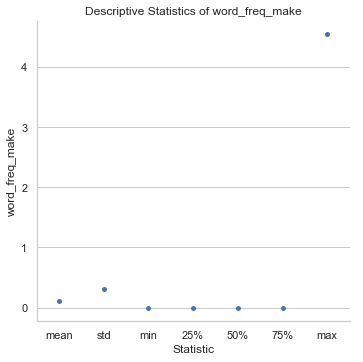

In [20]:
# Visualize the distribution of the variables
describe_df.reset_index(inplace=True)
describe_df = describe_df[describe_df['index'] != 'count']

# Plotting each feature's descriptive statistics
for column in describe_df.columns[2:3]:  # Skip the 'index' column and the target column
    plt.figure(figsize=(20, 10))
    sns.catplot(data=describe_df, x='index', y=column)
    plt.title(f'Descriptive Statistics of {column}')
    plt.ylabel(column)
    plt.xlabel('Statistic')
    plt.show()

## Data Visualization

In [27]:
correlation_matrix = data.iloc[:, :-1].corr()
correlation_matrix

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.000000,-0.016845,0.066099,0.013366,0.023420,0.059913,0.007922,-0.003872,0.106318,0.041220,...,-0.017925,-0.026637,-0.020763,-0.033592,0.058534,0.117980,-0.008803,0.044656,0.061702,0.089186
word_freq_address,-0.016845,1.000000,-0.033460,-0.006924,-0.023756,-0.024727,0.003962,-0.016280,-0.003799,0.032857,...,-0.015755,-0.007310,-0.049837,-0.018534,-0.014386,-0.009550,0.001971,0.002092,0.000299,-0.022692
word_freq_all,0.066099,-0.033460,1.000000,-0.020254,0.077927,0.087773,0.036820,0.012154,0.093893,0.032238,...,-0.026274,-0.033285,-0.016481,-0.033191,0.108289,0.087993,-0.003364,0.097495,0.107761,0.070148
word_freq_3d,0.013366,-0.006924,-0.020254,1.000000,0.003398,-0.009997,0.019965,0.010349,-0.002418,-0.004958,...,-0.001834,-0.000481,-0.012239,-0.007133,-0.003063,0.010897,-0.000235,0.005263,0.022266,0.021425
word_freq_our,0.023420,-0.023756,0.077927,0.003398,1.000000,0.053915,0.147615,0.029505,0.020926,0.034643,...,-0.031973,-0.032788,-0.046367,-0.026176,0.025545,0.041705,0.002058,0.052718,0.052332,0.002604
word_freq_over,0.059913,-0.024727,0.087773,-0.009997,0.053915,1.000000,0.061502,0.079758,0.117710,0.014007,...,-0.031621,-0.019016,-0.008230,-0.015181,0.065219,0.106161,0.019872,-0.010297,0.090575,0.082212
word_freq_remove,0.007922,0.003962,0.036820,0.019965,0.147615,0.061502,1.000000,0.044712,0.050992,0.056970,...,-0.031468,-0.033226,-0.051780,-0.027699,0.053750,0.070235,0.046698,0.041555,0.060022,-0.008212
word_freq_internet,-0.003872,-0.016280,0.012154,0.010349,0.029505,0.079758,0.044712,1.000000,0.105304,0.083163,...,-0.021260,-0.027397,-0.032505,-0.019698,0.031400,0.058124,-0.008106,0.011279,0.037760,0.040322
word_freq_order,0.106318,-0.003799,0.093893,-0.002418,0.020926,0.117710,0.050992,0.105304,1.000000,0.130817,...,-0.025954,-0.014778,-0.031182,0.012825,0.043821,0.149502,-0.000669,0.111563,0.189417,0.248807
word_freq_mail,0.041220,0.032857,0.032238,-0.004958,0.034643,0.014007,0.056970,0.083163,0.130817,1.000000,...,-0.016763,0.012070,0.004285,0.007170,0.037004,0.075849,0.044722,0.073785,0.103573,0.087392


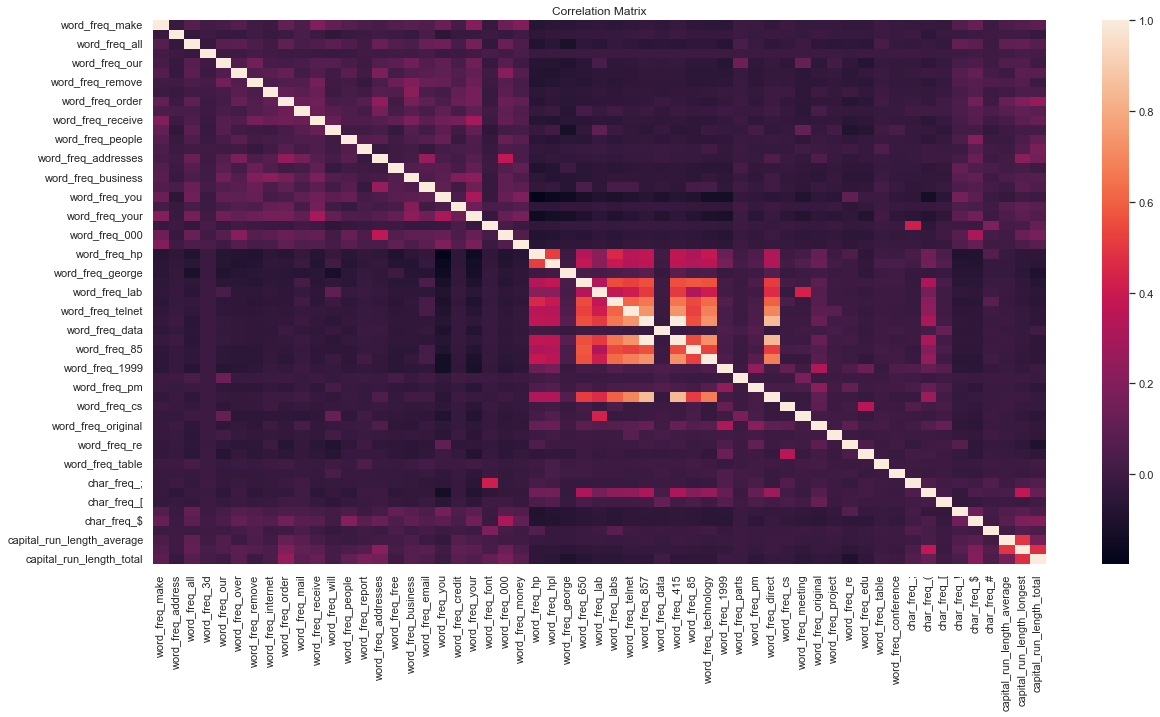

In [30]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

## Split the dataset and standardize the features

In [69]:
# Split the dataset into features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and testing sets, first 3600 rows for training and the rest for testing.
# 10% of the training set will be used for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3600, random_state=42)

print(f"Shape of the training set: {X_train.shape}")
print(f"Shape of the testing set: {X_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns, index=y_train.index)
X_test = pd.DataFrame(X_test, columns=X.columns, index=y_test.index)

X_train.iloc[8, :]
y_train[8]

Shape of the training set: (3600, 57)
Shape of the testing set: (1000, 57)


KeyError: 8

## Create ReplayCallback

In [48]:
# Create a ReplayData object
group_name = 'spam'
replaydata = ReplayData(X, y, filename='spam_dataset.h5', group_name=group_name)

NameError: name 'ReplayData' is not defined

## Build Keras Model

In [72]:
from sklearn.model_selection import KFold
import keras.initializers

kfolds = 5
epochs = 100
batch_size = 32

kf = KFold(n_splits=kfolds, shuffle=True, random_state=42)

VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

save_dir = '/saved_models/'
fold_var = 1

he_initializer = keras.initializers.initializers_v2.HeNormal(seed=42)
normal_initializer = keras.initializers.initializers_v2.RandomNormal(seed=42)

for train_idx, val_idx in kf.split(X_train, y_train):
    print(f"Train: {train_idx}, Validation: {val_idx}")

Train: [   1    2    3 ... 3596 3598 3599], Validation: [   0    7   14   17   25   26   30   31   32   33   44   45   51   52
   58   61   63   67   70   76   80   88   93   96  102  109  120  124
  134  139  144  149  152  157  166  170  173  174  175  176  178  179
  183  184  188  192  194  196  203  211  214  217  218  221  229  238
  239  240  246  247  251  254  256  257  258  263  266  270  274  278
  279  283  288  289  291  295  296  298  299  309  314  315  321  322
  324  325  331  332  343  346  351  354  358  368  371  387  393  402
  408  410  411  414  415  416  422  423  430  432  433  438  439  442
  443  449  450  457  461  463  478  479  485  486  495  501  505  506
  507  511  527  528  534  538  543  544  549  551  554  557  564  567
  570  573  576  578  594  596  599  602  605  610  612  621  642  644
  650  657  670  676  678  679  680  691  693  705  712  718  721  736
  744  746  752  755  759  761  764  776  781  785  787  790  794  798
  802  803  805  807 

In [74]:


for train_idx, val_idx in kf.split(X_train, y_train):
    training_data = X_train.iloc[train_idx]
    validation_data = X_train.iloc[val_idx]
    training_labels = y_train.iloc[train_idx]
    validation_labels = y_train.iloc[val_idx]
    
    model = Sequential()
    # Hidden layer with 10 units, taking the 57 features as inputs
    model.add(Dense(input_dim=training_data.shape[1],
                    units=10,
                    kernel_initializer=he_initializer,
                    activation='tanh'))
    
    # Added layer to allow plotting the feature space
    # It has 2 units and uses a LINEAR activation, so the network will also learn the
    # mapping from 10-dimensions to 2-dimensions
    model.add(Dense(units=2,
                    kernel_initializer=normal_initializer,
                    activation='linear',
                    name='hidden'))
    
    # Typical output layer for binary classification
    model.add(Dense(units=1,
                    kernel_initializer=normal_initializer,
                    activation='sigmoid',
                    name='output'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    print(f'Training for fold {fold_var} ...')

    # replaydata = ReplayData(X_train[train], y_train.iloc[train], filename='spam_dataset.h5', group_name=group_name)
    model.fit(training_data, training_labels, epochs=epochs, batch_size=batch_size, validation_split=0.1)

    print(f'Validation for fold {fold_var} ...')

    loss, accuracy = model.evaluate(validation_data, validation_labels)
    VALIDATION_ACCURACY.append(accuracy)
    VALIDATION_LOSS.append(loss)

    fold_var += 1
    
print("Cross-validation complete.")
print("Mean Validation Accuracy: ", np.mean(VALIDATION_ACCURACY))
print("Mean Validation Loss: ", np.mean(VALIDATION_LOSS))

Training for fold 6 ...
Epoch 1/100
81/81 [==============================] - 0s 924us/step - loss: 0.6833 - acc: 0.6312 - val_loss: 0.6541 - val_acc: 0.8194
Epoch 2/100
81/81 [==============================] - 0s 461us/step - loss: 0.5550 - acc: 0.8696 - val_loss: 0.4355 - val_acc: 0.9062
Epoch 3/100
81/81 [==============================] - 0s 471us/step - loss: 0.3512 - acc: 0.9012 - val_loss: 0.2941 - val_acc: 0.9201
Epoch 4/100
81/81 [==============================] - 0s 456us/step - loss: 0.2649 - acc: 0.9128 - val_loss: 0.2534 - val_acc: 0.9236
Epoch 5/100
81/81 [==============================] - 0s 438us/step - loss: 0.2351 - acc: 0.9198 - val_loss: 0.2391 - val_acc: 0.9271
Epoch 6/100
81/81 [==============================] - 0s 424us/step - loss: 0.2197 - acc: 0.9252 - val_loss: 0.2346 - val_acc: 0.9271
Epoch 7/100
81/81 [==============================] - 0s 448us/step - loss: 0.2097 - acc: 0.9286 - val_loss: 0.2319 - val_acc: 0.9271
Epoch 8/100
81/81 [==========================